# Introduction

Goal: **A company's HR department wants to predict whether some customers would leave the company in next 2 years. Your job is to build a predictive model that predicts the prospects of future and present employee.**

## Feature definitions

- Education - Education level [Bachelors,Masters,PhD].
- JoiningYear - Year of joining the company [2012,2013,2014,2015,2016,2017,2018].
- City - Working location [Bangalore,Pune,New Delhi].
- PaymentTier - Payment tier of the employee [1 (highest), 2 (mid-level),3 (lowest)].
- Age - Age of the employee [20-45].
- Gender - [Male,Female].
- EverBenched - Ever kept out of projects for 1 month or more ['Yes','No'].
- ExperienceInCurrentDomain - Experience in current domain
- LeaveOrNot - Which employee will leave the organizaion? [0 (no), 1 (yes)]

## Package Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier

Install *lightgmb* directly in the notebook:

```!pip install lightgbm```

## Retrieve data from Dataset

In [2]:
data = pd.read_csv("./archive/data.csv")

## Dataset statistics

Top rows of the dataset

In [76]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [77]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
JoiningYear,4653.0,2015.062970,1.863377,2012.0,2013.0,2015.0,2017.0,2018.0
PaymentTier,4653.0,2.698259,0.561435,1.0,3.0,3.0,3.0,3.0
Age,4653.0,29.393295,4.826087,22.0,26.0,28.0,32.0,41.0
ExperienceInCurrentDomain,4653.0,2.905652,1.558240,0.0,2.0,3.0,4.0,7.0
LeaveOrNot,4653.0,0.343864,0.475047,0.0,0.0,0.0,1.0,1.0


In [78]:
data.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

## Data Visualization

This section will present data analysis of bi-variate data between categorical/nominal features and the target variable **LeaveOrNot**. The visualization of the distribution of input features is clear. Thus, we decided to omit the visualization of a single variable/feature.

### Bi-variate analysis for categorical features

- **Education**

<AxesSubplot:xlabel='Education', ylabel='count'>

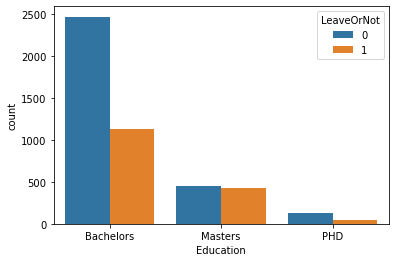

In [79]:
sns.countplot(data = data, x='Education', hue='LeaveOrNot')

- **City**

<AxesSubplot:xlabel='City', ylabel='count'>

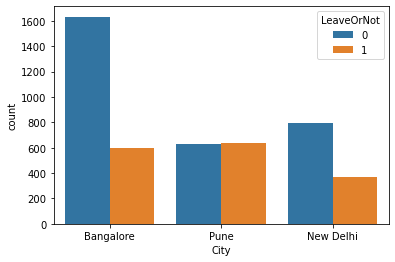

In [80]:
sns.countplot(data = data, x='City', hue='LeaveOrNot')

- **Gender**

<AxesSubplot:xlabel='Gender', ylabel='count'>

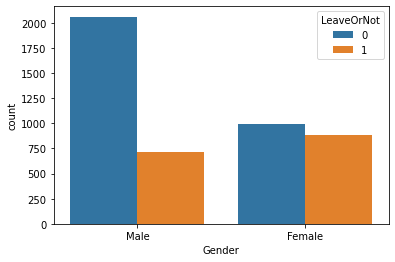

In [81]:
sns.countplot(data = data, x='Gender', hue='LeaveOrNot')

- **Ever Benched more than one month**

<AxesSubplot:xlabel='EverBenched', ylabel='count'>

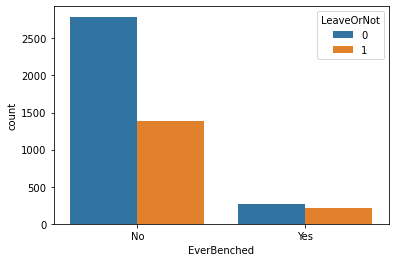

In [82]:
sns.countplot(data = data, x='EverBenched', hue='LeaveOrNot')

### Bi-variate analysis for continuous/nominal features:

- **Joining Year in the company**

<AxesSubplot:xlabel='JoiningYear', ylabel='count'>

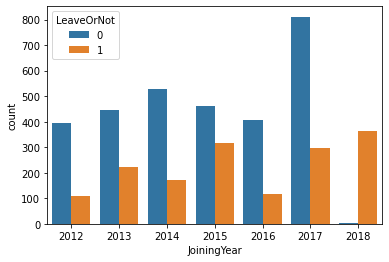

In [83]:
sns.countplot(data = data, x='JoiningYear', hue='LeaveOrNot')

- **Payment Tier of the employee (1 - highest to 3 - lowest)**

<AxesSubplot:xlabel='PaymentTier', ylabel='count'>

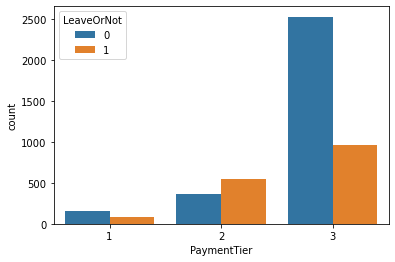

In [84]:
sns.countplot(data = data, x='PaymentTier', hue='LeaveOrNot')

- **Age**

<AxesSubplot:xlabel='Age', ylabel='count'>

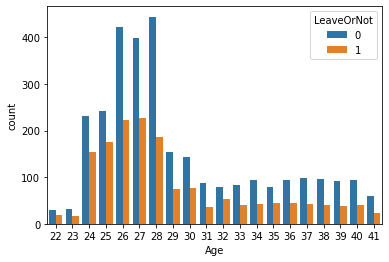

In [85]:
sns.countplot(data = data, x='Age', hue='LeaveOrNot')

- **Experience In Current Domain**

<AxesSubplot:xlabel='ExperienceInCurrentDomain', ylabel='count'>

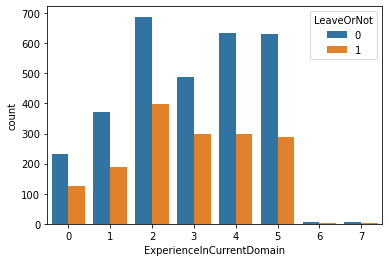

In [86]:
sns.countplot(data = data, x='ExperienceInCurrentDomain', hue="LeaveOrNot")

Age, PaymentTier and Joining Year are effect on leave or not decision for employee ("It's a small effect but it still effect")

In [87]:
fig = px.box(data, x="PaymentTier", y="ExperienceInCurrentDomain", color="Gender")
fig.update_traces(quartilemethod="exclusive")
fig.show()

##### **Does experience have an affect on Payment tier?**

In PaymentTier = 1, the experience of females is nearly the name like males and there are males with higher experience than females.

In PaymentTier = 2, the experience of females is nearly the name like males and there are females with higher experience than males.

In PaymentTier = 3, the average of females has more experience in domain than males.

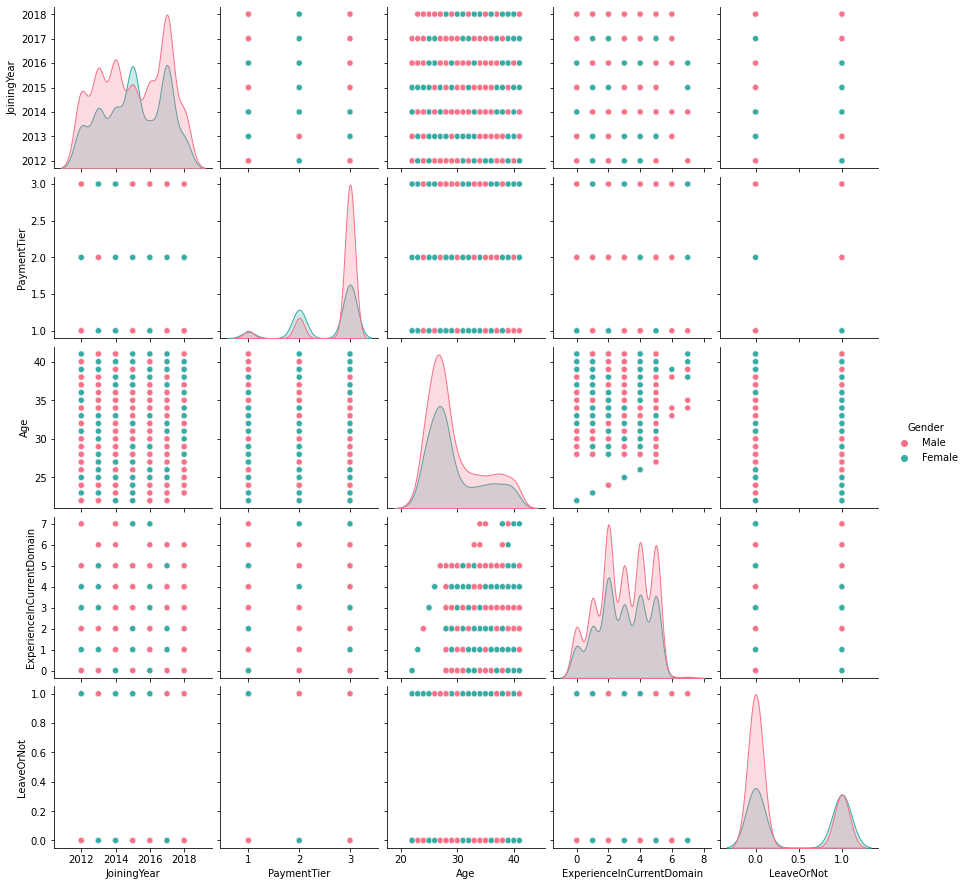

In [88]:
sns.pairplot(data = data , hue = "Gender" , palette = 'husl')

##### **Which employee is most likely to leave the company?**

* In terms of **education**, employees with **Masters degree**** are most likely to leave the company.

* Employees who joined in **recent year** are most likely to leave the company. Maybe they are not satisfied with thier salary or their department work culture.

* Employee from **Pune City** are most likely to leave. So, we should check this branch of the company.

* In terms of **Salary**, employee with **PaymentTier 3** are most likely to leave. They are very important for the company because of their level of experience, So company should offer a raise for those employees.

* **Female** employee are more likely to leave.

* Most of the employee who were **benched left** the company.

* As we analysed in **joining year** the employees with **less experience** are the one's who are leaving the company. The company can offer a raise in the salary.

* **Young** employees most likely to leave. The company should be a stable company and give them a raise in salary.


## Data Preprocessing


In [89]:
data.shape

(4653, 9)

In [90]:
data.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

There are no null values as we can see...

Let's check if there are duplicated values:

In [91]:
duplicates = data.duplicated().sum()

print('Number of duplicate records:', duplicates)

Number of duplicate records: 1889


Although there are 1889 duplicated records in the dataset, we didn't remove them since duplicates are what provide the weight of the evidence. Thus, the ML model should train by accumulating real-life data, considering frequency of rows.

#### Output distribution

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

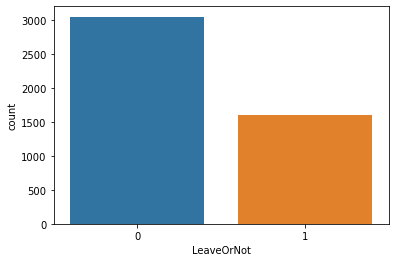

In [92]:
sns.countplot(data = data, x = 'LeaveOrNot', )
distribution = data['LeaveOrNot'].value_counts()
distribution

There are 3053 cases where the employee remained in the company compared to the 1600 employees that left the company. Since the output is not equally distributed (with 0 being almost double the value of 1), we need to (randomly) undersample the dataset so that the target variable has 1600 values with LeaveOrNot = 0 and 1600 values with LeaveOrNot = 1.

### Equally Distributed Dataset (undersampling)

In [93]:
# print("Data shape before undersampling")
# data.shape

# ones = data[data['LeaveOrNot'] == 1 ]
# zeroes = data[data['LeaveOrNot'] == 0 ]
# zeroes = zeroes.sample(n=len(ones), random_state=101)
# data = pd.concat([ones,zeroes],axis=0)

# print("Data shape after undersampling")
# data.shape

# sns.countplot(data = data, x = 'LeaveOrNot', )
# distribution = data['LeaveOrNot'].value_counts()

### Dataset types

In [94]:
data.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

As we can see from the previous output, we have:

- Ordinal Features: JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, LeaveOrNot (target)
- Categorical Features: Education (3 values), City (3 values), Gender (2 values), EverBenched (2 values)

We need to convert categorical features to ordinal features, in order to train our ML model.
The **total number of selected features**, already accounting ordinal encoding of categorical features, **is 14**.


In [3]:
## Transform categorical features into ordinal values
CATEGORICAL_FEATURES = ['Education','City','Gender','EverBenched']
data = pd.get_dummies(data=data, columns=CATEGORICAL_FEATURES, drop_first=True)

## Move output variable (LeaveOrNot) to the last position of the Dataframe for a better interpretation of the correlation matrix
output_column = data.pop('LeaveOrNot')
data = pd.concat([data, output_column], 1)
data.dtypes



/tmp/ipykernel_665134/3519987612.py:7: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, output_column], 1)


JoiningYear                  int64
PaymentTier                  int64
Age                          int64
ExperienceInCurrentDomain    int64
Education_Masters            uint8
Education_PHD                uint8
City_New Delhi               uint8
City_Pune                    uint8
Gender_Male                  uint8
EverBenched_Yes              uint8
LeaveOrNot                   int64
dtype: object

### Correlation Matrix

The correlation matrix is a very important table which displays the correlation coefficients between all different pair of variables in the dataset (input + output variables). This correlation matrix present the correlation values between ordinal values

<AxesSubplot:>

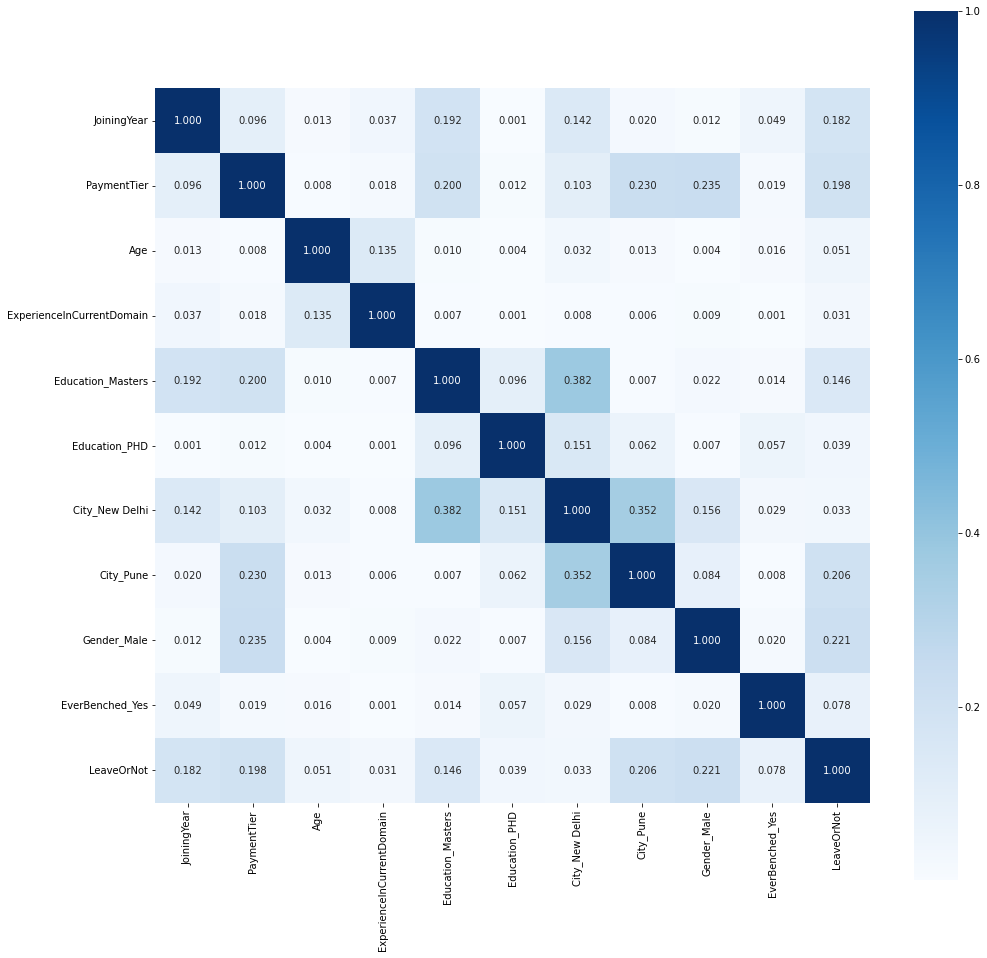

In [96]:
f, ax = plt.subplots(figsize=(16, 16))
correlation = data.corr()
sns.heatmap(abs(correlation), fmt='.3f', annot=True, cmap="Blues", square=True, ax=ax)

# Models

In [4]:
# Fit and transform data
scaler = StandardScaler()

X = data.drop(['LeaveOrNot'],axis=1)
y = data[['LeaveOrNot']]
y = y.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling and normalization of data
X_train = scaler.fit_transform(X_train)    
X_test = scaler.transform(X_test)

### Functions to train and analyse data

In [5]:
def train_and_analyze(model, X_train, y_train, X_test, y_test):
    # fitting the object
    model.fit(X_train, y_train)
    
    # finding the predicted valued
    y_pred = model.predict(X_test)

    # determine test accuracy
    test_data_accuracy = accuracy_score(y_pred, y_test)

    # F1_score = 2 * (P * R)/(P + R)
    #   P : Precision
    #   R : Recall of the model
    f1 = f1_score(y_test, y_pred)

    #   >> Accuracy vs F1-score
    # Accuracy is used when the True Positives and True negatives are more important 
    # while F1-score is used when the False Negatives and False Positives are crucial

    print()
    print("---- Model Analysis ----")
    print('Accuracy: ', test_data_accuracy * 100, "%")
    print('F1 Score: ', f1 * 100, "%")
    
    print()
    
    print("---- Confusion Matrix ----")
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print()
    print("---- Classification Report ----")
    print( classification_report(y_test, model.predict(X_test)) )
    


def hyperparameters(model, params, X, y):
    print(">> Find hyperparameters for a model")

    model = GridSearchCV(model, params, scoring="accuracy")
    model.fit(X, y)
    print(" Best Params:", model.best_params_)

    return model.best_params_



def kfold(model, k, X, Y):
    print(">> k-fold cross-validation")
    
    kf = KFold(n_splits=k, shuffle=True)
    scores = cross_validate(model, X, Y, scoring="accuracy", cv=kf, return_estimator=True)
    return scores["estimator"][np.argmax(scores["test_score"])]

## 1. Logistic Regression


---- Model Analysis ----
Accuracy:  74.43609022556392 %
F1 Score:  54.054054054054056 %

---- Confusion Matrix ----


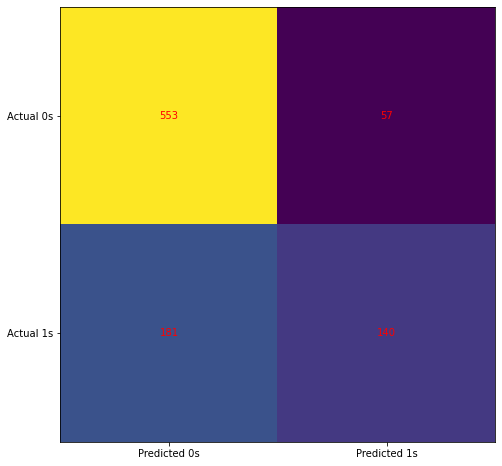


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       610
           1       0.71      0.44      0.54       321

    accuracy                           0.74       931
   macro avg       0.73      0.67      0.68       931
weighted avg       0.74      0.74      0.73       931

>> Find hyperparameters for a model
 Best Params: {'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

---- Model Analysis ----
Accuracy:  71.1063372717508 %
F1 Score:  62.482566248256624 %

---- Confusion Matrix ----


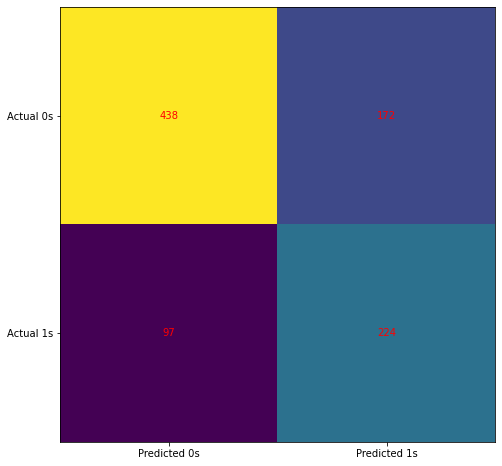


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       610
           1       0.57      0.70      0.62       321

    accuracy                           0.71       931
   macro avg       0.69      0.71      0.69       931
weighted avg       0.73      0.71      0.72       931

>> k-fold cross-validation

---- Model Analysis ----
Accuracy:  71.1063372717508 %
F1 Score:  62.482566248256624 %

---- Confusion Matrix ----


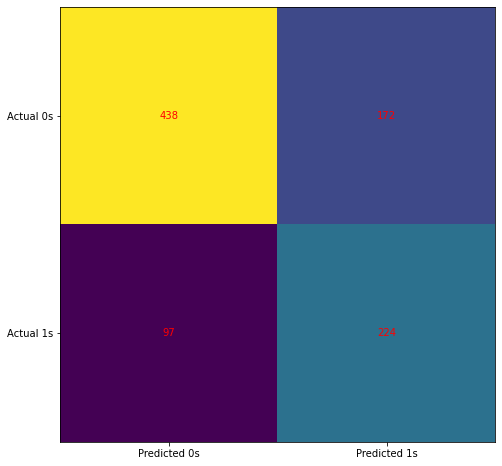


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       610
           1       0.57      0.70      0.62       321

    accuracy                           0.71       931
   macro avg       0.69      0.71      0.69       931
weighted avg       0.73      0.71      0.72       931



In [6]:
# Base Model
logreg = LogisticRegression()
train_and_analyze(logreg, X_train, y_train, X_test, y_test)

# Hypertuned Params
logreg_params = [{'solver': ['liblinear'], 'max_iter': [100, 400, 800],
                  'C': [0.1, 1, 10, 100, 1000], 'class_weight': ['balanced'],
                  'penalty': ['l1', 'l2']}]
best_logreg_params = hyperparameters(logreg, logreg_params , X_train, y_train)

logreg.set_params(**best_logreg_params)
train_and_analyze(logreg, X_train, y_train, X_test, y_test)

# K-Fold Cross-Validation
kf_logreg = kfold(logreg, 5, X, y)
train_and_analyze(kf_logreg, X_train, y_train, X_test, y_test)

#### 2. Support Vector Machine


---- Model Analysis ----
Accuracy:  85.17722878625135 %
F1 Score:  74.25373134328358 %

---- Confusion Matrix ----


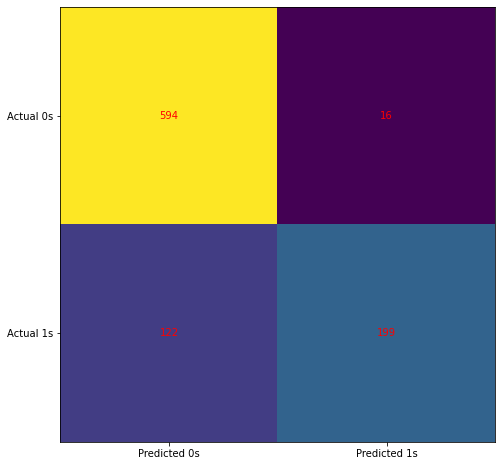


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       610
           1       0.93      0.62      0.74       321

    accuracy                           0.85       931
   macro avg       0.88      0.80      0.82       931
weighted avg       0.86      0.85      0.84       931

>> Find hyperparameters for a model
 Best Params: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

---- Model Analysis ----
Accuracy:  86.68098818474759 %
F1 Score:  77.37226277372262 %

---- Confusion Matrix ----


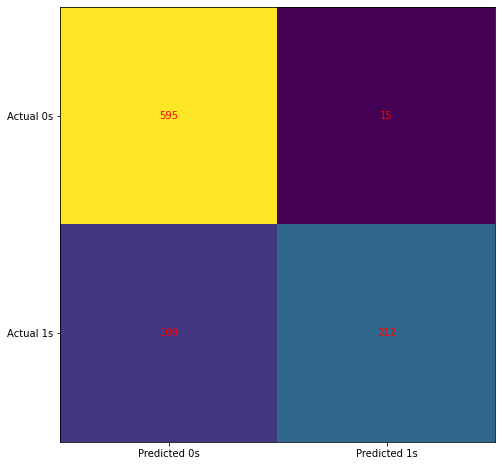


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       610
           1       0.93      0.66      0.77       321

    accuracy                           0.87       931
   macro avg       0.89      0.82      0.84       931
weighted avg       0.88      0.87      0.86       931

>> k-fold cross-validation

---- Model Analysis ----
Accuracy:  86.68098818474759 %
F1 Score:  77.37226277372262 %

---- Confusion Matrix ----


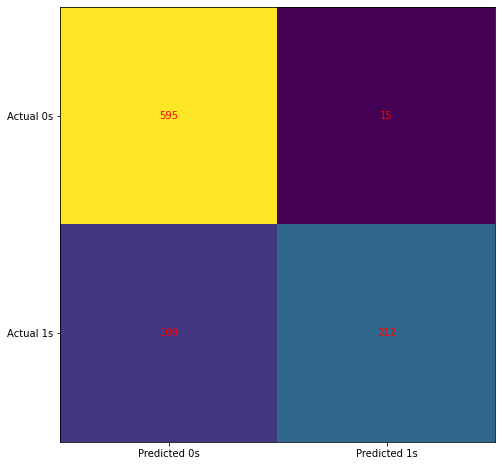


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       610
           1       0.93      0.66      0.77       321

    accuracy                           0.87       931
   macro avg       0.89      0.82      0.84       931
weighted avg       0.88      0.87      0.86       931



In [7]:
svm = SVC()

# Base Model
train_and_analyze(svm, X_train, y_train, X_test, y_test)

# Hypertuned Params  
svm_parameters = [{'C': [0.01, 0.1, 1, 10, 50, 100, 1000], 
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
              'kernel': ['rbf']}]
best_svm_params = hyperparameters(svm, svm_parameters , X_train, y_train)
svm.set_params(**best_svm_params)

train_and_analyze(svm, X_train, y_train, X_test, y_test)

# K-Fold Cross-Validation
kf_svm = kfold(svm, 5, X, y)
train_and_analyze(kf_svm, X_train, y_train, X_test, y_test)

#### 3. Multi-Layer Perceptron (MLP)


---- Model Analysis ----
Accuracy:  86.78839957035446 %
F1 Score:  77.67695099818512 %

---- Confusion Matrix ----


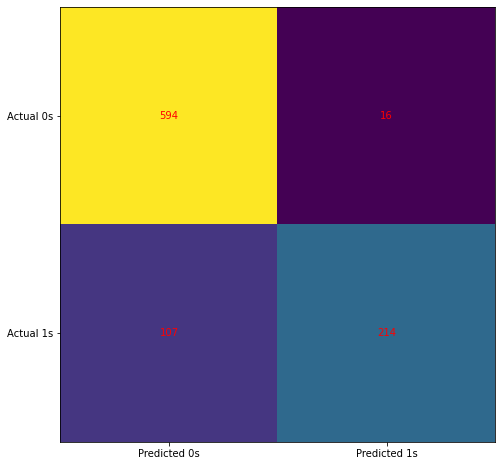


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       610
           1       0.93      0.67      0.78       321

    accuracy                           0.87       931
   macro avg       0.89      0.82      0.84       931
weighted avg       0.88      0.87      0.86       931

>> Find hyperparameters for a model
 Best Params: {'activation': 'tanh', 'hidden_layer_sizes': (8,), 'max_iter': 10000, 'solver': 'adam'}

---- Model Analysis ----
Accuracy:  87.0032223415682 %
F1 Score:  77.87934186471664 %

---- Confusion Matrix ----


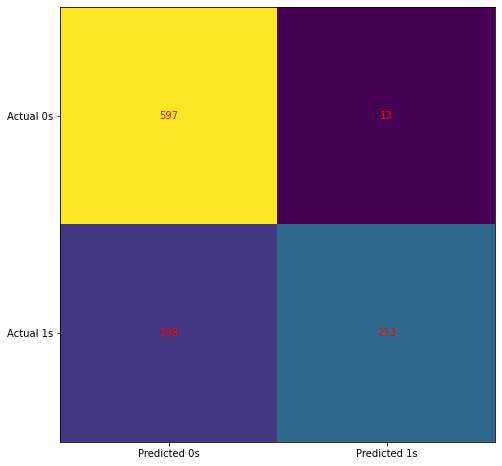


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       610
           1       0.94      0.66      0.78       321

    accuracy                           0.87       931
   macro avg       0.89      0.82      0.84       931
weighted avg       0.88      0.87      0.86       931

>> k-fold cross-validation

---- Model Analysis ----
Accuracy:  86.57357679914071 %
F1 Score:  77.55834829443447 %

---- Confusion Matrix ----


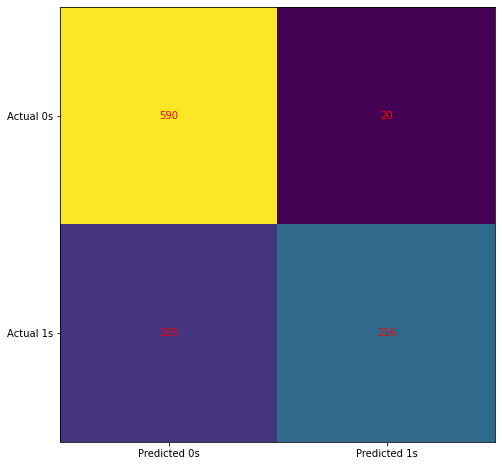


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       610
           1       0.92      0.67      0.78       321

    accuracy                           0.87       931
   macro avg       0.88      0.82      0.84       931
weighted avg       0.87      0.87      0.86       931



In [8]:
mlp = MLPClassifier(max_iter=10000)
train_and_analyze(mlp, X_train, y_train, X_test, y_test)

mlp_parameters = {
    'hidden_layer_sizes': [(2,),(3,),(4,),(6,),(8,),(100,)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'max_iter': [2000, 10000],
}

hyper_mlp_parameters = hyperparameters(mlp, mlp_parameters , X_train, y_train)
mlp.set_params(**hyper_mlp_parameters)
train_and_analyze(mlp, X_train, y_train, X_test, y_test)

kf_mlp = kfold(mlp, 5, X, y)
train_and_analyze(kf_mlp, X_train, y_train, X_test, y_test)

#### 4. Ensemble Voting


---- Model Analysis ----
Accuracy:  87.0032223415682 %
F1 Score:  78.43137254901961 %

---- Confusion Matrix ----


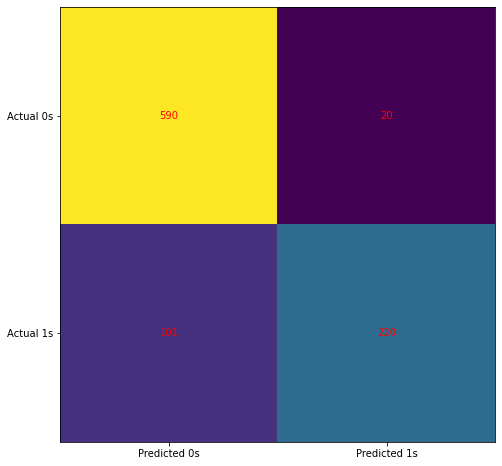


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       610
           1       0.92      0.69      0.78       321

    accuracy                           0.87       931
   macro avg       0.89      0.83      0.85       931
weighted avg       0.88      0.87      0.86       931

>> Find hyperparameters for a model


/home/reis/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/reis/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/reis/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/reis/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/reis/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/reis/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_voting.py", line 341, in predict
    maj = np.argmax(self

 Best Params: {'voting': 'hard', 'weights': (1, 2, 1)}

---- Model Analysis ----
Accuracy:  87.0032223415682 %
F1 Score:  77.71639042357272 %

---- Confusion Matrix ----


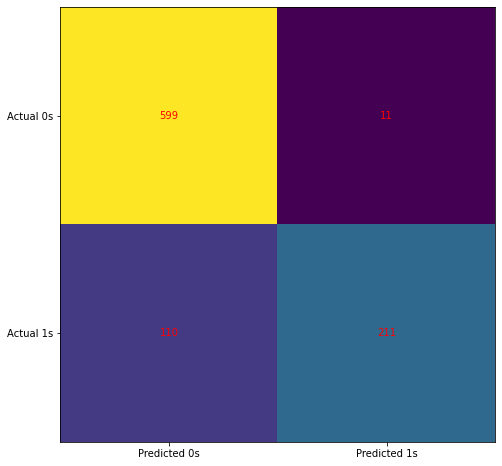


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       610
           1       0.95      0.66      0.78       321

    accuracy                           0.87       931
   macro avg       0.90      0.82      0.84       931
weighted avg       0.88      0.87      0.86       931

>> k-fold cross-validation

---- Model Analysis ----
Accuracy:  87.0032223415682 %
F1 Score:  77.79816513761469 %

---- Confusion Matrix ----


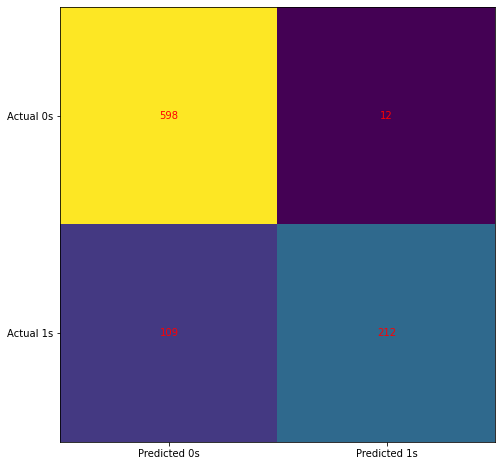


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       610
           1       0.95      0.66      0.78       321

    accuracy                           0.87       931
   macro avg       0.90      0.82      0.84       931
weighted avg       0.88      0.87      0.86       931



In [9]:
# using ensemble voting method
models = [('lg', kf_logreg), ('svm', kf_svm), ('mlp', kf_mlp)]
voting = VotingClassifier(estimators=models, voting='hard')
train_and_analyze(voting, X_train, y_train, X_test, y_test)

# Hypertuned Params  
voting_parameters = {'voting':['hard', 'soft'],
                    'weights':[(1,1,1), (2,1,1), 
                               (1,2,1), (1,1,2),
                               (2,2,1), (2,1,2), 
                               (1,2,2)]}
best_voting_params = hyperparameters(voting, voting_parameters , X_train, y_train)
voting.set_params(**best_voting_params)

train_and_analyze(voting, X_train, y_train, X_test, y_test)

# K-Fold Cross-Validation
kf_voting = kfold(voting, 5, X, y)
train_and_analyze(kf_voting, X_train, y_train, X_test, y_test)


#### 5. Gradient Boosting Classifier


---- Model Analysis ----
Accuracy:  79.16219119226639 %
F1 Score:  61.199999999999996 %

---- Confusion Matrix ----


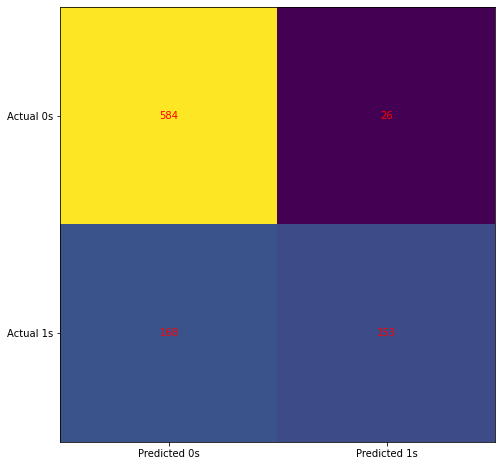


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       610
           1       0.85      0.48      0.61       321

    accuracy                           0.79       931
   macro avg       0.82      0.72      0.73       931
weighted avg       0.80      0.79      0.77       931

>> Find hyperparameters for a model
 Best Params: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 250}

---- Model Analysis ----
Accuracy:  87.11063372717508 %
F1 Score:  78.33935018050542 %

---- Confusion Matrix ----


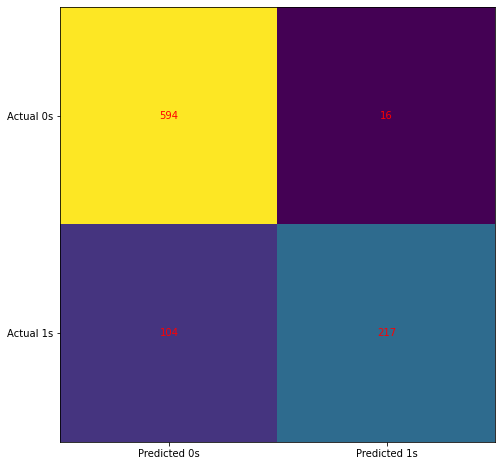


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       610
           1       0.93      0.68      0.78       321

    accuracy                           0.87       931
   macro avg       0.89      0.82      0.85       931
weighted avg       0.88      0.87      0.87       931

>> k-fold cross-validation

---- Model Analysis ----
Accuracy:  87.11063372717508 %
F1 Score:  78.33935018050542 %

---- Confusion Matrix ----


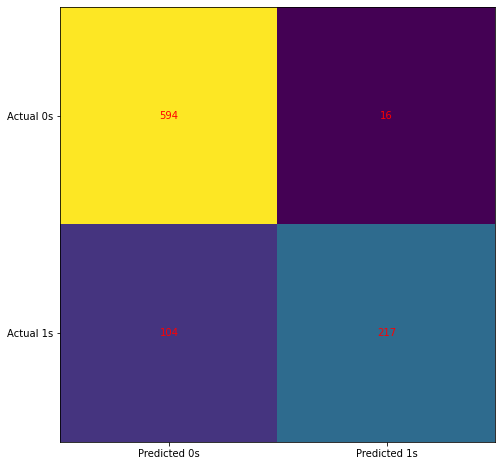


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       610
           1       0.93      0.68      0.78       321

    accuracy                           0.87       931
   macro avg       0.89      0.82      0.85       931
weighted avg       0.88      0.87      0.87       931



In [ ]:
gb = GradientBoostingClassifier(n_estimators=20, max_features=2, max_depth=2, random_state=0)

# Base Model
train_and_analyze(gb, X_train, y_train, X_test, y_test)

# Hypertuned Params  
gb_parameters = {
    "n_estimators": [5, 50, 250, 500],
    "max_depth": [1, 3, 5, 7, 9],
    "learning_rate": [0.01, 0.1, 0.8, 1, 10, 100]
}
best_gb_params = hyperparameters(gb, gb_parameters , X_train, y_train)
gb.set_params(**best_gb_params)

train_and_analyze(gb, X_train, y_train, X_test, y_test)

# K-Fold Cross-Validation
kf_gb = kfold(gb, 5, X, y)
train_and_analyze(kf_gb, X_train, y_train, X_test, y_test)

#### 6. Light Gradient Boost Machine


---- Model Analysis ----
Accuracy:  85.60687432867884 %
F1 Score:  76.89655172413794 %

---- Confusion Matrix ----


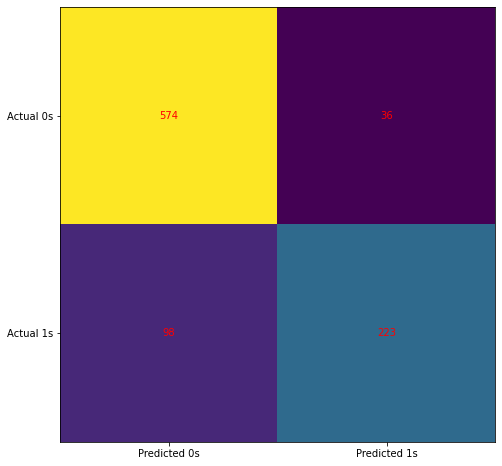


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       610
           1       0.86      0.69      0.77       321

    accuracy                           0.86       931
   macro avg       0.86      0.82      0.83       931
weighted avg       0.86      0.86      0.85       931

>> Find hyperparameters for a model
 Best Params: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 10}

---- Model Analysis ----
Accuracy:  85.06981740064447 %
F1 Score:  75.74171029668413 %

---- Confusion Matrix ----


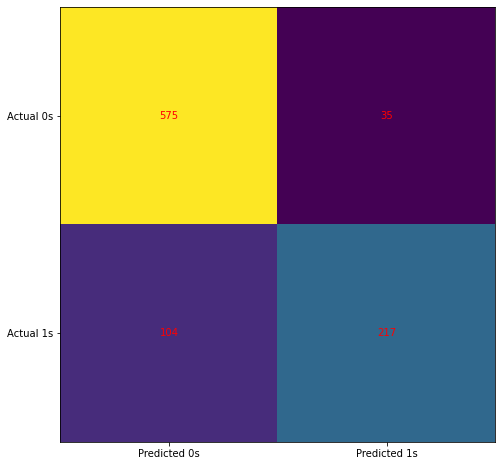


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       610
           1       0.86      0.68      0.76       321

    accuracy                           0.85       931
   macro avg       0.85      0.81      0.82       931
weighted avg       0.85      0.85      0.85       931

>> k-fold cross-validation

---- Model Analysis ----
Accuracy:  85.06981740064447 %
F1 Score:  75.74171029668413 %

---- Confusion Matrix ----


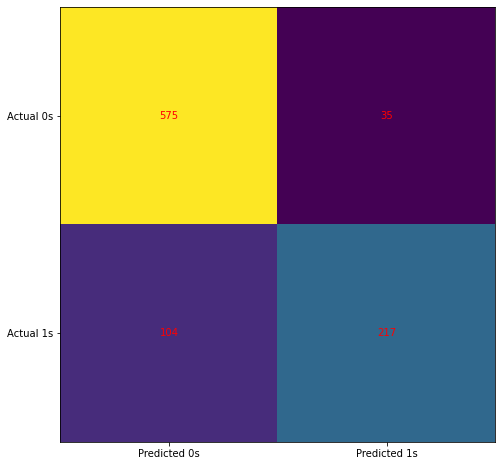


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       610
           1       0.86      0.68      0.76       321

    accuracy                           0.85       931
   macro avg       0.85      0.81      0.82       931
weighted avg       0.85      0.85      0.85       931



In [12]:
lgmb = LGBMClassifier()

# Base Model
train_and_analyze(lgmb, X_train, y_train, X_test, y_test)

# Hypertuned Params  
lgmb_parameters = {
    "n_estimators": [5, 10, 15, 25],
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.1, 0.3]
}
best_lgmb_params = hyperparameters(lgmb, lgmb_parameters , X_train, y_train)
lgmb.set_params(**best_lgmb_params)

train_and_analyze(lgmb, X_train, y_train, X_test, y_test)

# K-Fold Cross-Validation
kf_lgmb = kfold(lgmb, 5, X, y)
train_and_analyze(kf_lgmb, X_train, y_train, X_test, y_test)